# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-01-25 15:34:13.035445: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737840853.072452  244984 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737840853.085495  244984 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-25 15:34:13.150852: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.18.0'

## Part 1 - Data Processing

#### Preprocessing the Training set

In [3]:
# Transformations prevent overfitting and need (Image Augmentation)
# By doing this we get new images for more training

# will run this on the entire set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30, #added to improve the available dataset
    width_shift_range=0.2, #added to improve the available dataset
    height_shift_range=0.2, #added to improve the available dataset
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
    'data/cnn/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 8000 images belonging to 2 classes.


#### Preprocessing the Test set

In [4]:
# Be careful of leakage... so slightly different because only resizing, nothing else

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'data/cnn/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')


Found 2000 images belonging to 2 classes.


##  Part 2 - Building the CNN

### Initializing the CNN

In [5]:
cnn = tf.keras.models.Sequential()

#### Step 1 - Convolution

In [6]:
# how many filters to make
# kernel size is one side of the block so a 3x3 is just 3
# relu always if not output layer
# input shape is only for the first convolution layer

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3])) 

/home/fraher/code/deepnn/.env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1737840858.358993  244984 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6096 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


#### Step 2 - Pooling

In [7]:
# Pool size is the side of the block 2x2 is 2, strides is how far does it move over
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

##### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Step 3 - Flattening

In [9]:
# Down to 1D for the ANN

cnn.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) # ann input layer and first hidden

#### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # doing binary only

## Part 3 - Training the CNN

### Compliling the CNN

In [12]:
# Need the optimizer, loss function, and metrics
# can choose from several metrics to measure during training
# optimizer allows for stochastic gradient decent (adam)
# loss is way to compute difference (for binary, always use 'binary_crossentropy')
# if non-binary, then 'categorical_crossentropy'
# metrics are a list of ones to use



cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)


Epoch 1/30


/home/fraher/code/deepnn/.env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1737840861.003427  245119 service.cc:148] XLA service 0x7f2c0c00b200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737840861.003608  245119 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 with Max-Q Design, Compute Capability 7.5
2025-01-25 15:34:21.040136: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737840861.242481  245119 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-25 15:34:21.5854

  4/250 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.5046 - loss: 0.7182

I0000 00:00:1737840862.834718  245119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5258 - loss: 0.6932 

2025-01-25 15:34:41.558175: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,62,62]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,64,64]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-25 15:34:41.685132: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,29,29]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,31,31]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.5259 - loss: 0.6932 - val_accuracy: 0.5865 - val_loss: 0.6758
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.5785 - loss: 0.6781 - val_accuracy: 0.6535 - val_loss: 0.6431
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.6207 - loss: 0.6527 - val_accuracy: 0.6730 - val_loss: 0.6060
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.6530 - loss: 0.6227 - val_accuracy: 0.7155 - val_loss: 0.5703
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6764 - loss: 0.5979 - val_accuracy: 0.7035 - val_loss: 0.5716
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - accuracy: 0.6875 - loss: 0.5920 - val_accuracy: 0.7340 - val_loss: 0.5426
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.6935 - loss: 0.5797 - val_accuracy: 0.7410 - val_loss: 0.5297
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.6997 - loss: 0.5703 - val_accurac

## Part 4 - Making a single prediction

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image

#test_image = image.load_img('data/cnn/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))
#test_image = image.load_img('data/cnn/single_prediction/cat_or_dog_2.jpg', target_size=(64,64))
#test_image = image.load_img('data/cnn/single_prediction/cat.webp', target_size=(64,64))
test_image = image.load_img('data/cnn/single_prediction/litter.webp', target_size=(64,64))

# must convert to array using img_to_array
test_image = image.img_to_array(test_image)

# we have a dimension for batch_size... so we need to account for this
test_image = np.expand_dims(test_image, axis = 0) 

result = cnn.predict(test_image)

# Determine cat or dog
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else: 
    prediction = 'cat'

print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
cat


In [15]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
result

array([[0.9999881]], dtype=float32)

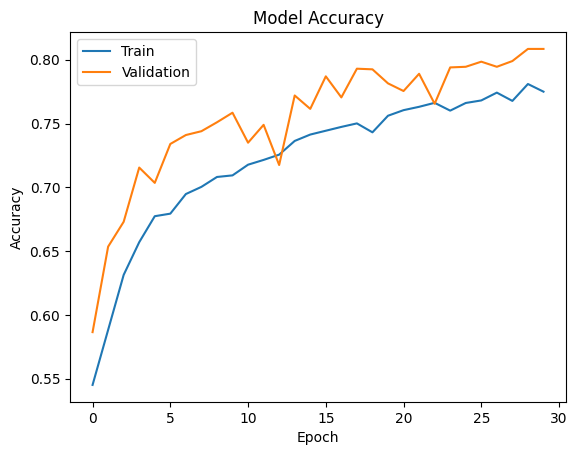

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
import pandas as pd

# Create a DataFrame from the history object
data = pd.DataFrame({
    'epoch': range(1, len(history.history['accuracy']) + 1),
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

# Melt the DataFrame to have a long-form representation
data_melted = data.melt(id_vars='epoch', var_name='Dataset', value_name='Accuracy')


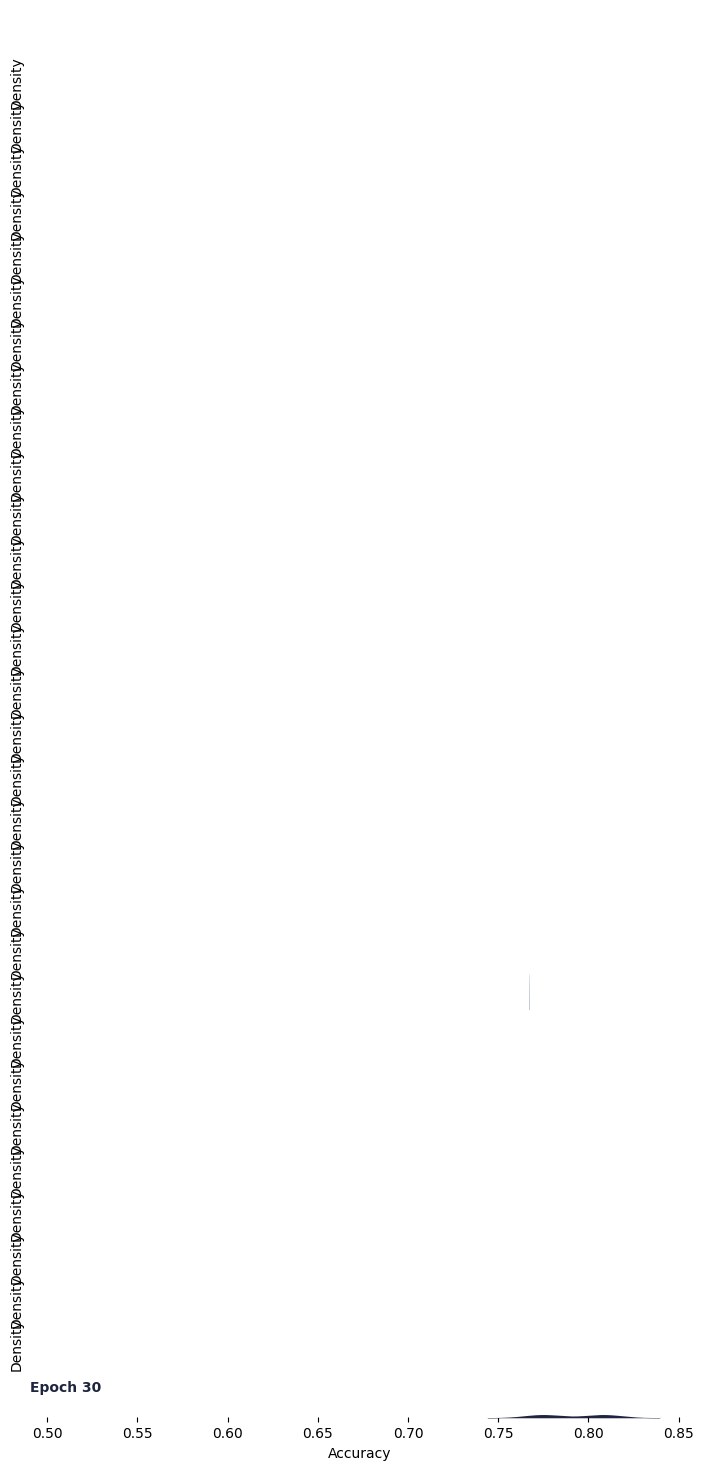

In [19]:
import seaborn as sns

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(len(data['epoch'].unique()), rot=-.25, light=.7)
g = sns.FacetGrid(data_melted, row="epoch", hue="epoch", aspect=15, height=0.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Accuracy", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Accuracy", clip_on=False, color="w", lw=2, bw_adjust=0.5)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, f'Epoch {label}', fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Accuracy")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.7)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()
